In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
import os

import torch
from torchvision import transforms
import mlflow

from evaluate import eval_model, evaluate_run, upload_test_results, DisplayResults
import _init_paths
from core.config import update_config, config
import dataset
from utils.visualization import joints

In [3]:
temp_path = 'tmp'

default_config = '../experiments/coco/resnet152/384x288_d256x3_adam_lr1e-3_TrainingLoopDefault.yaml'

os.environ["MLFLOW_TRACKING_URI"] = "http://localhost:5000"
os.environ["MLFLOW_S3_ENDPOINT_URL"] = "http://localhost:9000"
mlflow.set_tracking_uri("http://localhost:5000")
# mlflow.set_registry_uri("http://localhost:9000")

In [199]:
update_config(default_config)

trans = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])


test_dataset = dataset.coco(
    config,
    '../data/tennis_test/',
    'test2017',
    False,
    trans
)

test_dataset.image_set = 't_est2017'

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=config.TEST.BATCH_SIZE,
    shuffle=False,
    num_workers=config.WORKERS,
    pin_memory=True
)

In [5]:
experiment_ids = [0, 2, 3, 4]
runs = []
for experiment_id in experiment_ids:
    runs += mlflow.search_runs(experiment_ids=str(experiment_id))['run_id'].values.tolist()
runs

['49af7b584f03469d98c339245d5b2b23',
 '081b42a460924120af77f6cee1a7782c',
 '4102fec81ddb43388d80f85a9c5dae8d',
 'e324650bc77c4fe89a711f8ea8a9b9a1',
 '5a6b507b1dbe41adaaf66b44c9a22188',
 '6675a328409b403ebfb11fcef2a3ded7',
 '8f0c57249e564b668d88138d783a6ca8',
 '43fe19be4d604268b23e51ed0d15822b',
 '2809680ffcff48669ce315f75d7f9249',
 'd0b5e996924e4bed9e8e617e0773f3cc',
 '57e2320428804d0daa4d3a1ab4acf9f4',
 '69885e0593f847f3aab62b230d7eda6b',
 'b02e49382787494db87e634889989956',
 '305e7b9d90144dc79075b7e764f14c3f',
 '7d8506a2af6c4477b1a187595568b44b',
 '9d194ffa12f145f5bf994359c5fd36ae',
 '23170df0a5e44781bd64e45dfbbe2f31',
 'a2791694d2fc4d7d8c7343209904c02f',
 'cb4bf1341fc345259f1436e6a373a242',
 'fff5f701beab46c6bbfd7f8e991e4700',
 'b4bf469eb5d242cda0644efada86710d',
 'e2672858625244f1813be1b1b63404c3',
 '0ee7c9fd0d8841918994129dc5a6e82f',
 '66a4701d05c24a3e922770d93246dd3d',
 'b843163c6a274e31b412cd2cd7a5a60c',
 '5a31d2f2c10c40569d058f1eed856b4c',
 '2bd5fad450984958abc0b968b4eefadf',
 

# MLFlow Uploading

In [9]:
for id_ in runs:
    upload_test_results(id_, test_loader, use_dark=True)

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/1 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/1 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/1 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

# Display Evaluation

In [5]:
disp = DisplayResults('3e5cc8a513a14653a7e5ddcf8ed11f61', test_loader)


Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/json_tricks/encoders.py:419: UserWarning: json-tricks: numpy scalar serialization is experimental and may work differently in future versions
  warnings.warn('json-tricks: numpy scalar serialization is experimental and may work differently in future versions')


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

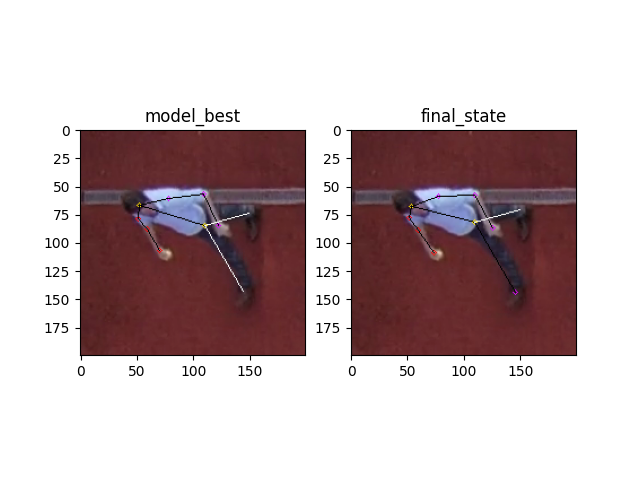

In [7]:
disp.display_fig()

In [8]:
disp.display_buttons()

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

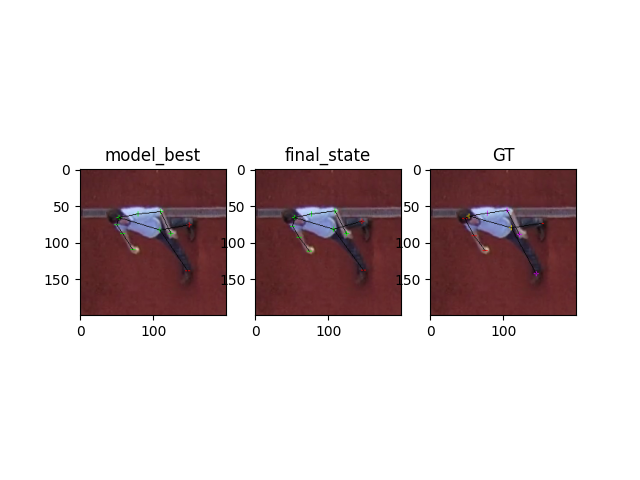

In [297]:
disp_dark = DisplayResults('a2791694d2fc4d7d8c7343209904c02f', test_loader, threshold=0.187, use_dark=True, weight_num=None)
disp_dark.display_fig()
self = disp_dark

In [337]:
disp_dark.worst_images(5)

array([[117, 129, 112, 130,  55],
       [129, 117, 130,  81,   3]])

In [338]:
disp_dark.worst_joint(5)

array([[7, 4, 5, 6, 3],
       [5, 4, 6, 7, 3]])

In [339]:
disp_dark.display_buttons()

# Data Evaluation

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

from core.inference import get_final_preds

np.set_printoptions(suppress=True)

In [7]:
def evaluate_test(run_id, test_loader, temp_path='tmp'):
    import glob
    from tqdm.notebook import tqdm
    
    mlflow.artifacts.download_artifacts(run_id=run_id, dst_path=temp_path)
    config_file = glob.glob(f"{temp_path}/*.yaml")
    assert len(config_file) == 1
    config_file = config_file[0]
    
    weight_paths = glob.glob(f"{temp_path}/*.pth.tar")
    prefixes = [os.path.split(path)[1].replace('.pth.tar', '') for path in weight_paths]
    results = []

    for weight in tqdm(weight_paths, desc="Models"):
        upload_dict = {}
        results = [eval_model(weight, test_loader)]
    # shutil.rmtree(temp_path)
    return prefixes, results


In [8]:
def vis_heatmap(arr):
    fig, axes = plt.subplots()
    heatmap = np.zeros_like(arr[0])
    for i in range(10):
        # flatten_axes[i].imshow(test_dataset[analyzed_frame][1][i])
        heatmap += arr[i]
        print(arr[i].max())
    heatmap[heatmap > 1] = 1
    axes.imshow(heatmap)

def calc_heat_score(sample, limb, coords_pred, visualize=False, debug=False):
    if visualize:
        plt.imshow(annotations[sample, limb])
    x, y = coords_pred[sample, limb]
    try:
        if x > annotations[sample, limb].shape[1] or x < 0 or y < 0 or y > annotations[sample, limb].shape[0]:
            return 0.0, 0.0
        b1 = x - math.floor(x)
        b2 = y - math.floor(y)
        a1 = annotations[sample, limb][math.floor(y), math.floor(x)]
        a2 = annotations[sample, limb][math.floor(y), math.ceil(x)]
        a3 = annotations[sample, limb][math.ceil(y), math.floor(x)]
        a4 = annotations[sample, limb][math.ceil(y), math.ceil(x)]
    except:
        debug = True
    if debug:
        print(f"{sample}, {limb}")
        print(f"x={x:.2f} y={y:.2f}")
        print(f"b1={b1:.2f} b2={b2:.2f}")
        print(f"{100*a1:.2f} {100*a2:.2f} {100*a3:.2f} {100*a4:.2f}")
        print(f"{b1*b2} {(1-b1)*b2} {b1*(1-b2)} {(1-b1)*(1-b2)}")
    return (b1*b2 * a1 + (1-b1)*b2 * a2 + b1*(1-b2) * a3 + (1-b1)*(1-b2) * a4)

def evaluate_sample(sample, coords_pred, maxvals_pred, limb_amount=10):
    scores = np.zeros([limb_amount, 2])
    for i in range(limb_amount):
        score, pred_score = calc_heat_score(sample, i, coords_pred)
        scores[i, 0] = score
        scores[i, 1] = maxvals_pred[sample, i]
    return scores

# vis_heatmap(results[0][4][analyzed_frame])

In [9]:
import math

import numpy as np
import cv2

from utils.transforms import transform_preds


def get_max_preds(batch_heatmaps):
    '''
    get predictions from score maps
    heatmaps: numpy.ndarray([batch_size, num_joints, height, width])
    '''
    assert isinstance(batch_heatmaps, np.ndarray), \
        'batch_heatmaps should be numpy.ndarray'
    assert batch_heatmaps.ndim == 4, 'batch_images should be 4-ndim'

    batch_size = batch_heatmaps.shape[0]
    num_joints = batch_heatmaps.shape[1]
    width = batch_heatmaps.shape[3]
    heatmaps_reshaped = batch_heatmaps.reshape((batch_size, num_joints, -1))
    idx = np.argmax(heatmaps_reshaped, 2)
    maxvals = np.amax(heatmaps_reshaped, 2)

    maxvals = maxvals.reshape((batch_size, num_joints, 1))
    idx = idx.reshape((batch_size, num_joints, 1))

    preds = np.tile(idx, (1, 1, 2)).astype(np.float32)

    preds[:, :, 0] = (preds[:, :, 0]) % width
    preds[:, :, 1] = np.floor((preds[:, :, 1]) / width)

    pred_mask = np.tile(np.greater(maxvals, 0.0), (1, 1, 2))
    pred_mask = pred_mask.astype(np.float32)

    preds *= pred_mask
    return preds, maxvals


def taylor(hm, coord):
    heatmap_height = hm.shape[0]
    heatmap_width = hm.shape[1]
    px = int(coord[0])
    py = int(coord[1])
    if 1 < px < heatmap_width-2 and 1 < py < heatmap_height-2:
        dx  = 0.5 * (hm[py][px+1] - hm[py][px-1])
        dy  = 0.5 * (hm[py+1][px] - hm[py-1][px])
        dxx = 0.25 * (hm[py][px+2] - 2 * hm[py][px] + hm[py][px-2])
        dxy = 0.25 * (hm[py+1][px+1] - hm[py-1][px+1] - hm[py+1][px-1] \
            + hm[py-1][px-1])
        dyy = 0.25 * (hm[py+2*1][px] - 2 * hm[py][px] + hm[py-2*1][px])
        derivative = np.matrix([[dx],[dy]])
        hessian = np.matrix([[dxx,dxy],[dxy,dyy]])
        if dxx * dyy - dxy ** 2 != 0:
            hessianinv = hessian.I
            offset = -hessianinv * derivative
            offset = np.squeeze(np.array(offset.T), axis=0)
            coord += offset
    return coord


def gaussian_blur(hm, kernel):
    border = (kernel - 1) // 2
    batch_size = hm.shape[0]
    num_joints = hm.shape[1]
    height = hm.shape[2]
    width = hm.shape[3]
    for i in range(batch_size):
        for j in range(num_joints):
            origin_max = np.max(hm[i,j])
            dr = np.zeros((height + 2 * border, width + 2 * border))
            dr[border: -border, border: -border] = hm[i,j].copy()
            dr = cv2.GaussianBlur(dr, (kernel, kernel), 0)
            hm[i,j] = dr[border: -border, border: -border].copy()
            hm[i,j] *= origin_max / np.max(hm[i,j])
    return hm


def get_final_heatmaps(config, batch_heatmaps, center, scale, use_dark=False):
    coords, maxvals = get_max_preds(batch_heatmaps)

    heatmap_height = batch_heatmaps.shape[2]
    heatmap_width = batch_heatmaps.shape[3]

    if use_dark:
        # post-processing
        batch_heatmaps = gaussian_blur(batch_heatmaps, config.TEST.BLUR_KERNEL)
        batch_heatmaps = np.maximum(batch_heatmaps, 1e-10)
        batch_heatmaps = np.log(batch_heatmaps)
        for n in range(coords.shape[0]):
            for p in range(coords.shape[1]):
                coords[n,p] = taylor(batch_heatmaps[n][p], coords[n][p])
    else:
        # post-processing
        if config.TEST.POST_PROCESS:
            for n in range(coords.shape[0]):
                for p in range(coords.shape[1]):
                    hm = batch_heatmaps[n][p]
                    px = int(math.floor(coords[n][p][0] + 0.5))
                    py = int(math.floor(coords[n][p][1] + 0.5))
                    if 1 < px < heatmap_width-1 and 1 < py < heatmap_height-1:
                        diff = np.array([hm[py][px+1] - hm[py][px-1],
                                        hm[py+1][px]-hm[py-1][px]])
                        coords[n][p] += np.sign(diff) * .25

    return coords, maxvals

    preds = coords.copy()

    # Transform back
    for i in range(coords.shape[0]):
        preds[i] = transform_preds(coords[i], center[i], scale[i],
                                   [heatmap_width, heatmap_height])

    return preds, maxvals


In [274]:
def analyze_run(run_id, test_loader, joints=joints, verbose=False):
    prefix, results = evaluate_run(run_id, test_loader)

    scores = np.zeros([len(results), len(annotations), 10, 2])

    
    for model_num in range(len(results)):
        coords_pred, maxvals_pred = get_final_heatmaps(config, results[model_num][4], results[model_num][5], results[model_num][6], True)
        for i in range(len(annotations)):
            scores[model_num, i] = evaluate_sample(i, coords_pred, maxvals_pred)
    
    y_corr = (scores[:, :,:,0] > 0.25).astype(int)
    probas_pred = scores[:, :,:,1]

    if verbose:
        for i in range(len(y_corr.sum(axis=1))):
            print(f"{i}: {y_corr.sum(axis=1)[i]}")
        for i, val in enumerate(joints):
            print(f"{val}: {y_corr.sum(axis=0)[i]}")

    return y_corr, probas_pred, scores, coords_pred, maxvals_pred, prefix, results

c = analyze_run('a2791694d2fc4d7d8c7343209904c02f', test_loader)

Models:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

In [283]:
print(c[0][0].sum(axis=0))
print(np.argsort(c[0][0].sum(axis=0))[:5])
print(c[0][0].sum(axis=1))
print(np.argsort(c[0][0].sum(axis=1))[:5])

[113 114 104 100  91  95  98  85 109 125]
[7 4 5 6 3]
[ 8  8  6  4  9  8  6  6  8  8 10  8  8  9  7  8  6 10 10  7  6 10 10  9
 10 10  5  6  6  8  6  9  4  9  5 10  9  5  8  9 10  9  7  7 10  4 10  8
  9  7  8  4  7 10  9  4  7  7  9  9  5  7 10 10 10  8  6  9  5  7  4  7
 10  9  7  4 10 10  8  7  5  7  9  8 10  9  7  4 10  7 10  5  6  9  8  9
  9 10 10  9 10  8  9 10  9  8  8  9  5 10  7  5  4  6 10  8  8  1 10 10
 10  9 10  9  9 10 10  9  7  2  4  5  8]
[117 129 112 130  55]


In [51]:
from collections import defaultdict
from tqdm.notebook import tqdm
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay, f1_score

worst_images = defaultdict(lambda: 0)
worst_joints = defaultdict(lambda: 0)

ap_val = defaultdict(lambda: [])
pr_curve = defaultdict(lambda: [])

for run in tqdm(runs):
    y_corr, probas_pred, scores, coords_pred, maxvals_pred, prefix, results = analyze_run(run, test_loader)

    for i in range(y_corr.shape[0]):

        ap_val[run] += [average_precision_score(y_corr[i].flatten(), probas_pred[i].flatten())]
        pr_curve[run] +=  [precision_recall_curve(y_corr[i].flatten(), probas_pred[i].flatten())]

        per_joint = y_corr[i].sum(axis=0)
        per_image = y_corr[i].sum(axis=1)
        
        for i in np.argsort(per_image)[:5]:
            worst_images[i] += 1
        
        for i in np.argsort(per_joint)[:3]:
            worst_joints[i] += 1

  0%|          | 0/47 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/1 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/1 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/1 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Models:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jfeil/.pyenv/versions/3.8.17/envs/DroneTracking/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

In [67]:
new_aps = []
for key, value in ap_val.items():
    for x in value:
        new_aps += [(key, x)]

In [70]:
sorted(new_aps, key=lambda x: x[1], reverse=True)

[('a2791694d2fc4d7d8c7343209904c02f', 0.9387368354446297),
 ('e2672858625244f1813be1b1b63404c3', 0.9374613141581886),
 ('d0b5e996924e4bed9e8e617e0773f3cc', 0.9368811865085794),
 ('d61beb2d898447ccb68e4cb35e0298aa', 0.9367701541244933),
 ('0bb70701a2fd4e2b8795ed9e69d47bbd', 0.936429359834027),
 ('5a31d2f2c10c40569d058f1eed856b4c', 0.9362784506731565),
 ('3e5cc8a513a14653a7e5ddcf8ed11f61', 0.9349882222888125),
 ('d4b4dc86ffd9459aa8ba02e03118dbe5', 0.934954773916593),
 ('2809680ffcff48669ce315f75d7f9249', 0.9344295885668451),
 ('fff5f701beab46c6bbfd7f8e991e4700', 0.9334226055204838),
 ('b4bf469eb5d242cda0644efada86710d', 0.9331011499487906),
 ('e2672858625244f1813be1b1b63404c3', 0.9324784327463149),
 ('a8d8c9d6fe19402b8d7be00378864ff1', 0.9319155639679793),
 ('0bb70701a2fd4e2b8795ed9e69d47bbd', 0.9316200065560243),
 ('d61beb2d898447ccb68e4cb35e0298aa', 0.9309693519885128),
 ('9d194ffa12f145f5bf994359c5fd36ae', 0.9299232447778921),
 ('5a31d2f2c10c40569d058f1eed856b4c', 0.9298289542287),
 (

In [ ]:
probas_pred[i]

In [87]:
sorted(worst_images.items(), key=lambda x: x[1]) 

[(49, 1),
 (79, 1),
 (66, 1),
 (95, 1),
 (93, 1),
 (92, 1),
 (78, 1),
 (0, 1),
 (84, 1),
 (83, 1),
 (89, 1),
 (21, 1),
 (34, 1),
 (65, 1),
 (113, 1),
 (131, 1),
 (109, 1),
 (116, 1),
 (115, 1),
 (114, 1),
 (108, 2),
 (82, 2),
 (68, 2),
 (53, 2),
 (85, 2),
 (112, 2),
 (101, 3),
 (6, 3),
 (3, 3),
 (30, 3),
 (61, 4),
 (27, 4),
 (28, 4),
 (57, 5),
 (91, 5),
 (75, 5),
 (81, 6),
 (60, 6),
 (26, 7),
 (14, 8),
 (19, 9),
 (55, 9),
 (88, 10),
 (45, 10),
 (87, 11),
 (9, 12),
 (111, 12),
 (37, 13),
 (51, 29),
 (130, 39),
 (32, 47),
 (117, 76),
 (129, 80)]

In [83]:
for key in worst_joints:
    print(f"{joints[key]}: {worst_joints[key]}")

Elbow Right: 73
Hand Right: 73
Foot Left: 23
Hand Left: 27
Elbow Left: 11
Foot Right: 60
Hip: 3
Shoulder Right: 1
Shoulder Left: 2


In [43]:
worst_joints

defaultdict(<function __main__.<lambda>()>,
            {4: 37, 5: 36, 6: 10, 3: 13, 2: 6, 7: 34, 8: 3, 1: 1, 0: 1})

In [51]:
y_corr.sum(axis=1)[np.argsort()[:5]]

array([1, 2, 4, 4, 4])

In [39]:
y_corr.sum(axis=0)

array([113, 114, 104, 100,  91,  95,  98,  85, 109, 125])

In [148]:
w_ = x2 - x1
h_ = y2 - y1
w_, h_

(85.46250462532043, 113.95000219345093)

In [141]:
w_ = int(np.round(x2 - x1))
h_ = int(np.round(y2 - y1))

In [147]:
h_ / w_

1.3333332868375865

In [134]:
heatmap.shape[0] / heatmap.shape[1]

1.3333333333333333

In [109]:
288 / 72
384 / 96

4.0

In [72]:
heatmap_img = cv2.applyColorMap(heatmap*255, cv2.COLORMAP_JET)

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/colormap.cpp:736: error: (-5:Bad argument) cv::ColorMap only supports source images of type CV_8UC1 or CV_8UC3 in function 'operator()'


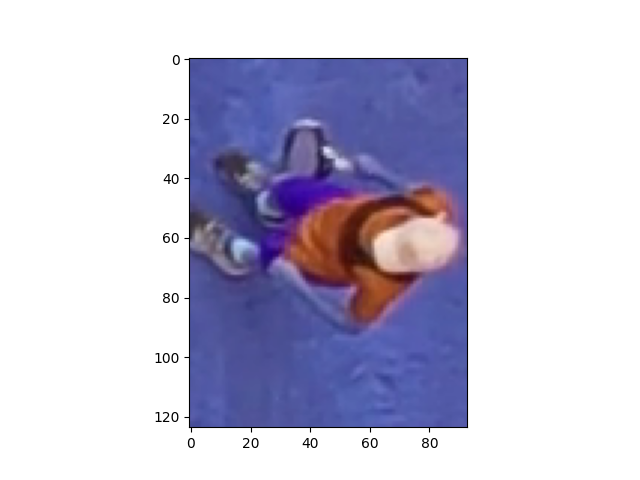

In [122]:
fig, axes = plt.subplots()
axes.imshow(frame[y1:y2, x1:x2, :])

In [13]:
import _init_paths


In [28]:
results[0][4].shape

(133, 10, 96, 72)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


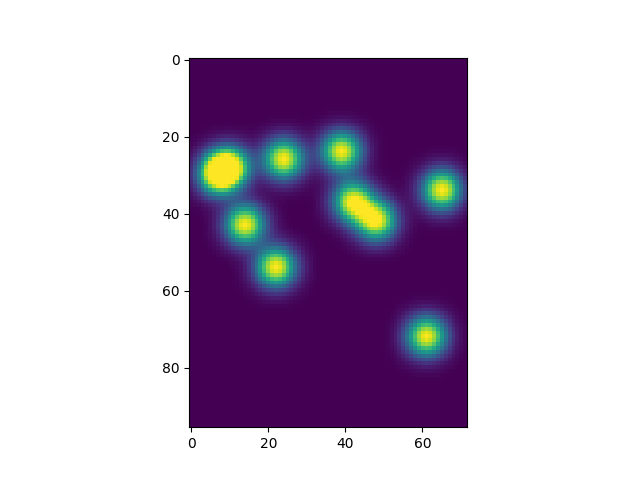

In [35]:
vis_heatmap(annotations[0])

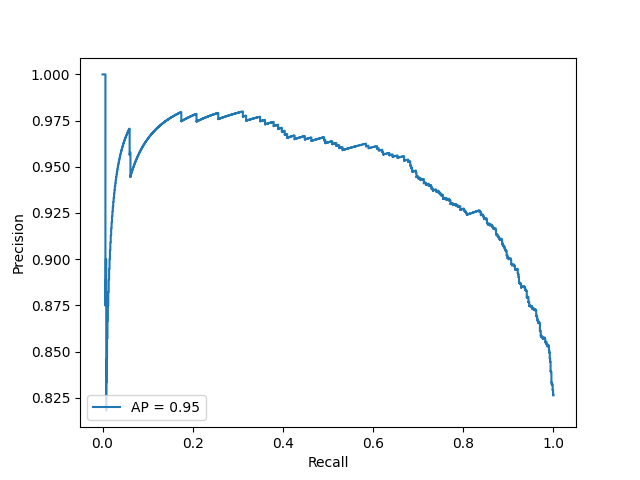

In [271]:
f1_scores = [f1_score(y_true, probas_pred >= t_) for t_ in t]
optimum = np.argmax(f1_scores)
optimum

55

In [272]:
f1_scores[optimum]

0.9165964616680706

In [273]:
p[optimum]

0.8533333333333334

In [274]:
r[optimum]

0.9899909008189263

In [275]:
t[optimum]

0.18700863420963287